# Presentation

This notebook is used for generating figures for the presentation of the project.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from ddro import pg
import os

FIGURE_DIR = os.path.join("..", "doc", "figure")

We create a toy example to introduce the public to the problem.

In [36]:
# Reproducibility
np.random.seed(1234)

# Limits of the space
x_lim = (-10, 10)
y_lim = (-10, 10)
num_fac = 10
num_cs = 30
fac_pos = np.stack(
    (
        np.random.uniform(x_lim[0], x_lim[1], num_fac),
        np.random.uniform(y_lim[0], y_lim[1], num_fac)
    ),
    axis=1
)
cs_pos = np.stack(
    (
        np.random.uniform(x_lim[0], x_lim[1], num_cs),
        np.random.uniform(y_lim[0], y_lim[1], num_cs)
    ),
    axis=1
)
dd_sup = np.arange(1, 100)  # Demand support
fac_cap = np.random.uniform(10, 50, size=num_fac)  # Facility capacities
cs_rev = np.random.normal(150, 10, num_cs)  # Costumer site revenues
cs_pen = np.repeat(250, num_cs)  # Costumer site penalties
t_factor = np.random.uniform(
    1, 3, size=(num_fac, num_cs)
)  # Transportation factor
dist = lambda x, y: np.linalg.norm(x - y)  # L2 distance
## Compute the distances between facilities and costumer sites
## and compute the transportation costs
t_costs = np.empty_like(t_factor)
for i in range(num_fac):
    for j in range(num_cs):
        t_costs[i, j] = t_factor[i, j] * dist(fac_pos[i], cs_pos[j])

/tmp/ipykernel_65248/911493777.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


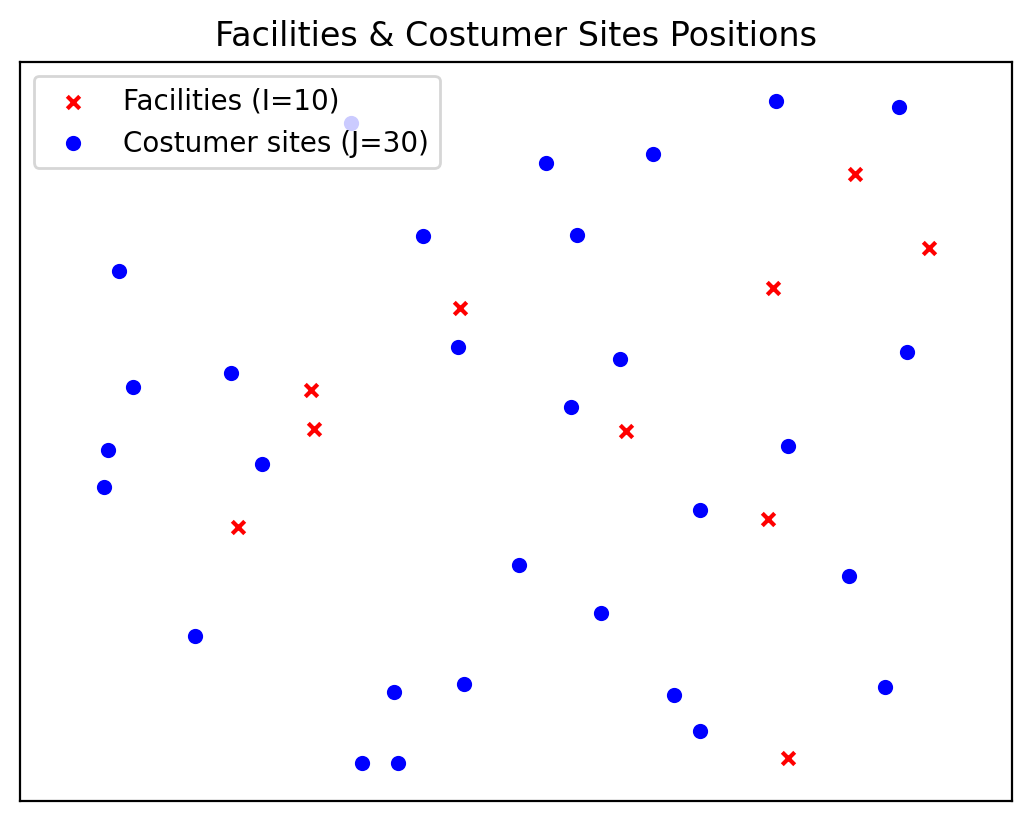

In [37]:
# Plot facility and costumer site positions
fig = plt.figure(dpi=200)
ax = fig.add_subplot()
ax.set_title("Facilities & Costumer Sites Positions")
ax.set_xlim(-11, 11)
ax.set_ylim(-11, 11)
# ax.grid(visible=True)
ax.scatter(
    fac_pos[:, 0], fac_pos[:, 1], c="red", marker="x", s=20, label=f"Facilities (I={num_fac})"
)
ax.scatter(
    cs_pos[:, 0], cs_pos[:, 1], c="blue", marker="o", s=20, label=f"Costumer sites (J={num_cs})"
)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.legend()
fig.savefig(os.path.join(FIGURE_DIR, "facility_costumer_site_pos.png"))
fig.show()